In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, JLD
E, x, y  = -100..100, -10..10,  -10..10
box = E × x × y
using CairoMakie, GLMakie

In [48]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [49]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [ ]:
# limit cycle I0 = -1.70; U0 = 0.24

In [159]:
I0 = -1.675; U0 = 0.214
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.516933929318748, 0.6578256737356879, 0.5888948000481755]
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 5.19759  0.822629  0.80229
 6.73574  0.781603  0.646426
 1.08448  0.956948  0.974468

In [160]:
index_fp = 2

2

In [161]:
ei[index_fp]

3-element Vector{ComplexF64}:
 -0.3037724075671347 + 0.0im
    0.75911350320849 - 7.006496344132568im
    0.75911350320849 + 7.006496344132568im

In [162]:
fp[index_fp]

3-element SVector{3, Float64} with indices SOneTo(3):
 6.735736486507377
 0.78160273614079
 0.6464256660741374

In [155]:
ϵ = 1e-6
shift_unstable = fp[index_fp] + (real(ei[index_fp]) .*[0, ϵ, ϵ] )

3-element SVector{3, Float64} with indices SOneTo(3):
 8.069477401196988
 0.7439416597463686
 0.46504366393060187

In [156]:
tr, trange = trajectory(ds, 500, shift_unstable, Δt = tstep,)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

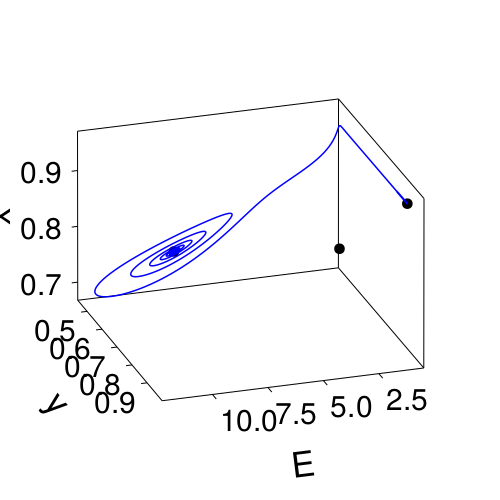

CairoMakie.Screen{IMAGE}


In [158]:
st, ed = 1, 500000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (500, 500))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

for fp_ in fp
    scatter!(fp_[idx], fp_[idy], fp_[idz], color = :black, markersize = 15)
end

lines!(ax, tr[st:ed, idx], tr[st:ed, idy], tr[st:ed, idz], lw = 1.0, color = :blue)
display(f)